In [230]:
import numpy as np

# La boite générique

In [414]:
class Boite():

  def __init__(self):
    pass

  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.operation()
    return self.output

  def backward(self, derivee_output):
    assert derivee_output.shape == self.output.shape, f"La derivee_output reçue a un shape {derivee_output.shape} et different du shape de output : {self.output.shape}"

    self.derivee_inputs = self.gradient(derivee_output)
    assert self.derivee_inputs.shape == self.inputs.shape, f"La derivee_input calculée a un shape {self.derivee_inputs.shape } et different du shape de inputs : {self.inputs.shape}"

    return self.derivee_inputs


  def operation(self):
    pass

  def gradient(self, derivee_output):
    pass


# La boite paramètrée

In [301]:
class BoiteParam():

  def __init__(self, param):
    self.param = param

  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.operation()
    return self.output

  def backward(self, derivee_output):
    assert derivee_output.shape == self.output.shape, f"La derivee_output reçue a un shape {derivee_output.shape} et different du shape de output : {self.output}"

    self.derivee_inputs = self.gradient(derivee_output)
    assert self.derivee_inputs.shape == self.inputs.shape, f"La derivee_input calculée a un shape {self.derivee_inputs.shape } et different du shape de inputs : {self.inputs.shape}"

    self.derivee_param = self.gradient_param(derivee_output)
    assert self.derivee_param.shape == self.param.shape, f"La derivee de param a un shape {self.derivee_param.shape} et different du shape de param : {self.param.shape}"

    return self.derivee_inputs


  def operation(self):
    pass

  def gradient(self, derivee_output):
    pass


  def gradient_param(self, derivee_output):
    pass

# La classe Dot

In [302]:
class Dot(BoiteParam):

  def __init__(self, weights):
    super().__init__(weights)

  def operation(self):
    return np.dot(self.inputs, self.param)

  def gradient(self, derivee_output):
    return np.dot( derivee_output, self.param.T)

  def gradient_param(self, derivee_output):
    return np.dot(self.inputs.T, derivee_output)

  def __repr__(self):
    return "DotProduct"

In [303]:
X = np.array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [304]:
X.shape

(4, 3)

In [305]:
W = np.array([[ 0.49671415],
 [-0.1382643 ],
 [ 0.64768854]])
W.shape

(3, 1)

In [ ]:
np.dot(X, W)

array([[-0.71674168],
       [ 0.64784656],
       [-0.81703373],
       [ 1.89943266]])

In [236]:
M = Dot(weights=W)
out = M.forward(X)
out

array([[-0.71674168],
       [ 0.64784656],
       [-0.81703373],
       [ 1.89943266]])

In [237]:
M

DotProduct

In [238]:
d_out = np.random.randn(4, 1)
d_out

array([[ 1.52302986],
       [-0.23415337],
       [-0.23413696],
       [ 1.57921282]])

In [239]:
M.backward(d_out)

array([[ 0.75651048, -0.21058066,  0.98644898],
       [-0.11630729,  0.03237505, -0.15165846],
       [-0.11629914,  0.03237278, -0.15164782],
       [ 0.78441735, -0.21834875,  1.02283804]])

# La classe ADD

In [306]:
class Add(BoiteParam):

  def __init__(self, biais):
    super().__init__(biais)

  def operation(self):
    return self.inputs + self.param

  def gradient(self, derivee_output):
    return np.ones_like(self.inputs) * derivee_output

  def gradient_param(self, derivee_output):
    r =  np.ones_like(self.param) * derivee_output
    return r.sum(axis=0).reshape(1, self.param.shape[1])

  def __repr__(self):
    return "AddBiais"

In [307]:

B = np.random.rand(1, 1)
B

array([[0.15601864]])

In [242]:
b = Add(biais=B)
b

AddBiais

In [243]:
out_b = b.forward(out)
out_b

array([[-0.69615719],
       [ 0.66843105],
       [-0.79644924],
       [ 1.92001715]])

In [244]:
d_out

array([[ 1.52302986],
       [-0.23415337],
       [-0.23413696],
       [ 1.57921282]])

In [245]:
b.backward(d_out)

array([[ 1.52302986],
       [-0.23415337],
       [-0.23413696],
       [ 1.57921282]])

# La classe Sigmoid

In [422]:
class Sigmoid(Boite):

  def __init__(self):
    super().__init__()

  def operation(self):
    return 1 / (1 + np.exp(-1 * self.inputs))

  def gradient(self, derivee_output):
    return self.output * (1 - self.output) * derivee_output

  def __repr__(self):
    return "sigmoid"

In [247]:
sig = Sigmoid()

In [248]:
sig_out = sig.forward(out_b)
sig_out

array([[0.33266478],
       [0.66115176],
       [0.31078557],
       [0.87214035]])

In [249]:
sig.backward(d_out)

array([[ 0.33811099],
       [-0.05245741],
       [-0.05015164],
       [ 0.17610049]])

# La classe Loss

In [309]:
class Loss():

  def __init__(self):
    pass

  def forward(self, prediction, target):
    assert prediction.shape == target.shape, f"Prediction shape {prediction.shape}  Target shape {target.shape}"
    self.prediction = prediction
    self.target = target
    loss = np.mean((self.target - self.prediction) ** 2)
    return loss

  def backward(self):

    self.loss_derivee = -2 * (self.target - self.prediction)
    assert self.loss_derivee.shape == self.prediction.shape, f"La derivee du loss un shape {self.loss_derivee.shape } et different du shape de Prediction : {self.prediction.shape}"

    return self.loss_derivee






In [251]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [310]:
Y = np.random.randn(4, 1)
Y

array([[ 1.52302986],
       [ 0.27904129],
       [ 1.01051528],
       [-0.58087813]])

In [311]:
P = sig_out

In [312]:
mse = Loss()

In [313]:
mse.forward(P, Y)

1.0409654495073746

In [314]:
mse.backward()

array([[-2.38073015],
       [ 0.76422093],
       [-1.39945942],
       [ 2.90603696]])

# La Classe Dense

In [421]:
class Dense():

  def __init__(self, neurons, activation=None):
    self.neurons = neurons
    self.activation = activation
    self.params = []
    self.suite = []
    self.initialisation = True


  def build(self, inputs):
    # weights initialization
    np.random.seed(42)

    self.weights = np.random.randn(inputs.shape[1], self.neurons)
    self.biais = np.random.randn(1, self.neurons)

    self.params.append(self.weights)
    self.params.append(self.biais)

    # construction de la suite d'opération
    self.suite = [Dot(weights=self.params[0]), Add(biais=self.params[1])]
    if self.activation:
      self.suite.append(self.activation)



  def forward(self, inputs):
    if self.initialisation:
      self.build(inputs)
      self.initialisation = False

    for boite in self.suite:
      inputs = boite.forward(inputs)

    self.output = inputs

    return self.output


  def backward(self, derivee_output):
    assert derivee_output.shape == self.output.shape

    for boite in reversed(self.suite):
      derivee_output = boite.backward(derivee_output)

    derivee_inputs = derivee_output

    self.get_layer_gradients()

    return derivee_inputs

  def get_layer_gradients(self):

    self.derivee_params = []

    for boite in self.suite:
      if issubclass(boite.__class__, BoiteParam):
        self.derivee_params.append(boite.derivee_param)



  def __repr__(self):
    r = f"DenseLayer(neurons={self.neurons})"
    if self.activation:
      r += " avec Sigmoid"

    return r




In [316]:
sigmoid = Sigmoid()

In [317]:
couche = Dense(neurons=2, activation=sigmoid)

In [318]:
couche

DenseLayer(neurons=2) avec Sigmoid

In [319]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [320]:
couche.forward(X)

array([[0.99320003, 0.99604286],
       [0.99912347, 0.99968533],
       [0.42276305, 0.97817014],
       [0.97978765, 0.99941659]])

In [321]:
couche.params

[array([[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696]]),
 array([[1.57921282, 0.76743473]])]

In [264]:
d_out = np.random.randn(4, 2)
d_out

array([[-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753]])

In [265]:
couche.backward(d_out)

array([[-0.00187061,  0.00120335,  0.00024173],
       [-0.00018133, -0.00048599,  0.00012933],
       [ 0.03497832, -0.02397904, -0.00426045],
       [-0.0169224 , -0.02262434,  0.00807543]])

In [266]:
couche.suite

[DotProduct, AddBiais, sigmoid]

# La classe Model

In [451]:
from copy import deepcopy

In [454]:
class Model():

  def __init__(self, layers):
    self.layers = layers
    self.compiled = False


  def forward(self, inputs):


    for layer in self.layers:

      inputs = layer.forward(inputs)
    self.output = inputs
    return self.output


  def backward(self, loss_derivee):

    assert loss_derivee.shape == self.output.shape

    for layer in reversed(self.layers):
      loss_derivee = layer.backward(loss_derivee)

    return None

  def get_params(self):
    for layer in self.layers:
      yield from layer.params


  def get_derivee_params(self):
    for layer in self.layers:
      yield from layer.derivee_params


  def update(self):

    for (param, derivee_param) in zip(self.get_params(), self.get_derivee_params()):
      assert param.shape == derivee_param.shape
      param -=   self.learning_rate * derivee_param


  def compile(self, loss, learning_rate):
    self.loss = loss
    self.learning_rate = learning_rate
    self.compiled = True


  def fit(self, X, Y, epochs, validation_data=None):

    if validation_data:
      assert len(validation_data) == 2
      assert validation_data[0].shape[1] == X.shape[1]
      assert validation_data[1].shape[1] == Y.shape[1]

    self.history = {"loss":[]}
    if validation_data:
      self.history['val_loss'] = []


    if not self.compiled:
      raise NotImplementedError("Pas de loss et de learning_rate: Compilez")

    for epoch in range(epochs):
      # forward pass
      predictions = model.forward(X)
      loss = self.loss.forward(predictions, Y)
      self.history['loss'].append(loss)


      # val loss
      if validation_data:
        val_preds = model.forward(validation_data[0])
        val_loss = self.loss.forward(val_preds, validation_data[1])
        self.history['val_loss'].append(val_loss)

      log = f'Epoch {epoch+1} .............. loss : {loss}'
      if validation_data:
        log += f"  ....val_loss : {val_loss}"
      print(log)



      # backward pass
      loss_derivee = self.loss.backward()
      self.backward(loss_derivee)

      # update
      self.update()

    return self.history

  def save_model(self, file):
    model_save = deepcopy(self)

    import pickle
    with open(file, "wb") as f:
      pickle.dump(model_save, f)


  def __repr__(self):

    r = "Layers ................."
    for layer in self.layers:
      r += f" \n {str(layer)}"

    return r




In [326]:
model = Model(layers = [ Dense(neurons=3, activation=sigmoid),
       Dense(neurons=1)])

In [327]:
model

Layers ................. 
 DenseLayer(neurons=3) avec Sigmoid 
 DenseLayer(neurons=1)

In [328]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [329]:
Y

array([[ 1.52302986],
       [ 0.27904129],
       [ 1.01051528],
       [-0.58087813]])

In [330]:
model.forward(X)

array([[2.47005633],
       [2.53479834],
       [1.89807891],
       [1.92678186]])

In [331]:
loss_derivee = np.random.randn(4, 1)
loss_derivee

array([[-0.23415337],
       [-0.23413696],
       [ 1.57921282],
       [ 0.76743473]])

In [332]:
model.backward(loss_derivee)

In [333]:
model.get_params()

<generator object Model.get_params at 0x7f92357eccf0>

In [334]:
model.get_derivee_params()

<generator object Model.get_derivee_params at 0x7f92357ecdd0>

# Update des paramètres

In [335]:
M

DotProduct

In [336]:
issubclass(M.__class__, BoiteParam)

False

In [337]:
M.__class__

__main__.Dot

In [338]:
M.param

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

In [339]:
M.derivee_inputs

array([[ 0.75651048, -0.21058066,  0.98644898],
       [-0.11630729,  0.03237505, -0.15165846],
       [-0.11629914,  0.03237278, -0.15164782],
       [ 0.78441735, -0.21834875,  1.02283804]])

In [340]:
couche.params

[array([[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696]]),
 array([[1.57921282, 0.76743473]])]

In [341]:
couche.derivee_params

AttributeError: ignored

In [356]:
model = Model(layers = [ Dense(neurons=2, activation=sigmoid),
       Dense(neurons=1)])
#forward
P = model.forward(X)
mse = Loss()
loss = mse.forward(P, Y)
print(loss)
#backward
loss_derivee = mse.backward()
model.backward(loss_derivee)

0.842077961233807


In [361]:
model.update()

In [362]:
P = model.forward(X)
mse = Loss()
loss = mse.forward(P, Y)
print(loss)

0.6952654031037216


In [ ]:
P

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [ ]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [ ]:
model.forward(X)

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [ ]:
model.layers[1].params

[array([[ 0.49671415],
        [-0.1382643 ],
        [ 0.64768854]]),
 array([[1.52302986]])]

# Test de la fonction fit

In [371]:
model = Model(layers = [ Dense(neurons=2, activation=sigmoid),
       Dense(neurons=1)])
mse = Loss()
model.compile(loss=mse, learning_rate=0.01)
h = model.fit(X, Y, epochs=10)


Epoch 1 .............. loss : 0.842077961233807
Epoch 2 .............. loss : 0.7777763005223045
Epoch 3 .............. loss : 0.7378092038206442
Epoch 4 .............. loss : 0.7127364993320435
Epoch 5 .............. loss : 0.6967967141402815
Epoch 6 .............. loss : 0.6864678726180334
Epoch 7 .............. loss : 0.6795949011879614
Epoch 8 .............. loss : 0.6748583180356648
Epoch 9 .............. loss : 0.6714498781367876
Epoch 10 .............. loss : 0.6688742506264982


# Comparaison Tensorflow

In [372]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([Dense(units=2, activation='sigmoid'),
                    Dense(units=1)])
model.compile(optimizer=SGD(learning_rate=0.1), loss='mse')
history = model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 670ms/step - loss: 0.6090
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5552
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.5371
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5276
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5204
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5139
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.5078
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5019
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 0.4963
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.4908


In [373]:
??Sequential

# Validation

In [379]:
model = Model(layers = [ Dense(neurons=2, activation=sigmoid),
       Dense(neurons=1)])
mse = Loss()
model.compile(loss=mse, learning_rate=0.01)
h = model.fit(X, Y, epochs=10, validation_data=(X, Y))

Epoch 1 .............. loss : 0.842077961233807  ....val_loss : 0.842077961233807
Epoch 2 .............. loss : 0.7777763005223045  ....val_loss : 0.7777763005223045
Epoch 3 .............. loss : 0.7378092038206442  ....val_loss : 0.7378092038206442
Epoch 4 .............. loss : 0.7127364993320435  ....val_loss : 0.7127364993320435
Epoch 5 .............. loss : 0.6967967141402815  ....val_loss : 0.6967967141402815
Epoch 6 .............. loss : 0.6864678726180334  ....val_loss : 0.6864678726180334
Epoch 7 .............. loss : 0.6795949011879614  ....val_loss : 0.6795949011879614
Epoch 8 .............. loss : 0.6748583180356648  ....val_loss : 0.6748583180356648
Epoch 9 .............. loss : 0.6714498781367876  ....val_loss : 0.6714498781367876
Epoch 10 .............. loss : 0.6688742506264982  ....val_loss : 0.6688742506264982


# Test du code final sur le boston dataset

In [380]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
Y = target.reshape((506, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [382]:
X_train.shape, y_train.shape

((379, 13), (379, 1))

In [383]:
X_test.shape, y_test.shape

((127, 13), (127, 1))

## Regression linéaire simple

In [390]:
model = Model([ Dense(neurons=1)])
mse = Loss()
model.compile(loss=mse, learning_rate=0.001)
h = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1 .............. loss : 712.1743316753176  ....val_loss : 671.7547143671588
Epoch 2 .............. loss : 384.0837028693358  ....val_loss : 383.82786822291087
Epoch 3 .............. loss : 247.75414344252928  ....val_loss : 229.1941295737599
Epoch 4 .............. loss : 148.3806303920543  ....val_loss : 144.19534190777878
Epoch 5 .............. loss : 103.89520896898965  ....val_loss : 96.47739842280843
Epoch 6 .............. loss : 71.33479105168065  ....val_loss : 69.15302180485378
Epoch 7 .............. loss : 55.97937743045081  ....val_loss : 53.20253156199875
Epoch 8 .............. loss : 44.69041961018085  ....val_loss : 43.70966230146516
Epoch 9 .............. loss : 39.11541183660613  ....val_loss : 37.94536623883121
Epoch 10 .............. loss : 35.00552004305203  ....val_loss : 34.3691118394618
Epoch 11 .............. loss : 32.86685286102087  ....val_loss : 32.09754754821056
Epoch 12 .............. loss : 31.27998033095609  ....val_loss : 30.616578716256143
Epoch 13 

In [392]:
h.keys()

dict_keys(['loss', 'val_loss'])

In [394]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):


  plt.plot(list(range(len(history['loss']))), history['loss'])
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Learning Curve")
  plt.show()

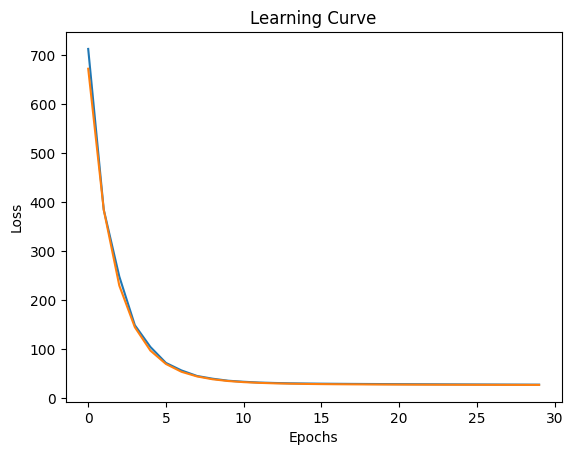

In [395]:
plot_learning_curve(h)

## Réseau de neurones simple

In [435]:
sigmoid = Sigmoid()
model = Model([ Dense(neurons=3, activation=sigmoid),
                Dense(neurons=1)
                ])

In [436]:
model

Layers ................. 
 DenseLayer(neurons=3) avec Sigmoid 
 DenseLayer(neurons=1)

In [437]:
mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)
h = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1 .............. loss : 507.9248956497336  ....val_loss : 492.311693850643
Epoch 2 .............. loss : 466.24520089721494  ....val_loss : 451.5607557083814
Epoch 3 .............. loss : 427.7318622051442  ....val_loss : 413.9124130384742
Epoch 4 .............. loss : 391.9445763802112  ....val_loss : 378.9220233229542
Epoch 5 .............. loss : 358.64849568841305  ....val_loss : 346.36124271593445
Epoch 6 .............. loss : 327.7617822429383  ....val_loss : 316.1600493240994
Epoch 7 .............. loss : 299.2676236516309  ....val_loss : 288.3099264728872
Epoch 8 .............. loss : 273.13622523629294  ....val_loss : 262.78193463964385
Epoch 9 .............. loss : 249.29517625915642  ....val_loss : 239.50103731811706
Epoch 10 .............. loss : 227.63791951268425  ....val_loss : 218.36067475205962
Epoch 11 .............. loss : 208.03992319108744  ....val_loss : 199.24113995526798
Epoch 12 .............. loss : 190.36761824850086  ....val_loss : 182.0169604282577
Ep

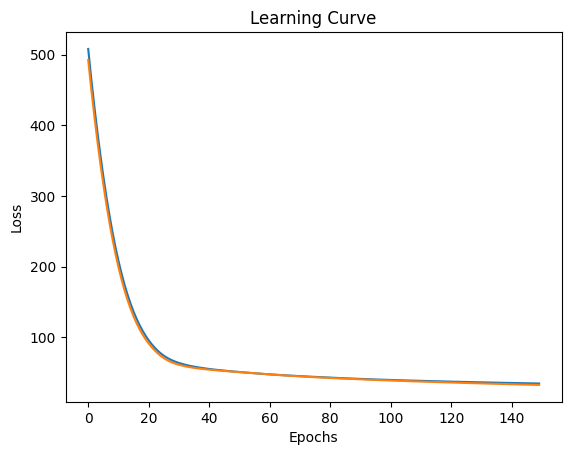

In [438]:
plot_learning_curve(h)

## Deep Neural Network

In [447]:
sigmoid = Sigmoid()
model = Model([ Dense(neurons=13, activation=sigmoid),
               Dense(neurons=1),

                ])

In [448]:
model

Layers ................. 
 DenseLayer(neurons=13) avec Sigmoid 
 DenseLayer(neurons=1)

In [449]:
mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)
h = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1 .............. loss : 609.4535263872165  ....val_loss : 594.285047596059
Epoch 2 .............. loss : 494.7172454598782  ....val_loss : 479.0339597155269
Epoch 3 .............. loss : 403.8643944989146  ....val_loss : 388.125852443045
Epoch 4 .............. loss : 331.0559254119759  ....val_loss : 315.67394558965
Epoch 5 .............. loss : 272.44802631944543  ....val_loss : 257.80096535791387
Epoch 6 .............. loss : 225.32104126553727  ....val_loss : 211.7461595039089
Epoch 7 .............. loss : 187.60578616146617  ....val_loss : 175.37471756759948
Epoch 8 .............. loss : 157.62037539699094  ....val_loss : 146.91491099254424
Epoch 9 .............. loss : 133.9379615740088  ....val_loss : 124.84238208175846
Epoch 10 .............. loss : 115.33306807953525  ....val_loss : 107.84460906755527
Epoch 11 .............. loss : 100.76383198721742  ....val_loss : 94.8136613248053
Epoch 12 .............. loss : 89.36281102397759  ....val_loss : 84.83959359519152
Epoch 1

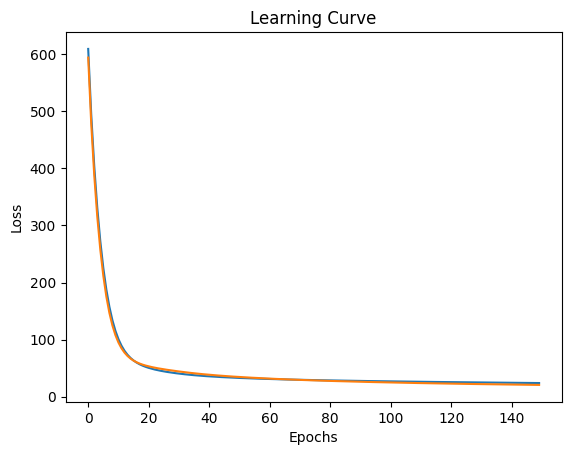

In [450]:
plot_learning_curve(h)

# Sauvegarder le Modèle

In [455]:
sigmoid = Sigmoid()
model = Model([ Dense(neurons=13, activation=sigmoid),
               Dense(neurons=1),

                ])

In [456]:
mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)
h = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1 .............. loss : 609.4535263872165  ....val_loss : 594.285047596059
Epoch 2 .............. loss : 494.7172454598782  ....val_loss : 479.0339597155269
Epoch 3 .............. loss : 403.8643944989146  ....val_loss : 388.125852443045
Epoch 4 .............. loss : 331.0559254119759  ....val_loss : 315.67394558965
Epoch 5 .............. loss : 272.44802631944543  ....val_loss : 257.80096535791387
Epoch 6 .............. loss : 225.32104126553727  ....val_loss : 211.7461595039089
Epoch 7 .............. loss : 187.60578616146617  ....val_loss : 175.37471756759948
Epoch 8 .............. loss : 157.62037539699094  ....val_loss : 146.91491099254424
Epoch 9 .............. loss : 133.9379615740088  ....val_loss : 124.84238208175846
Epoch 10 .............. loss : 115.33306807953525  ....val_loss : 107.84460906755527


In [457]:
model.save_model('model.file')

In [458]:
import pickle

def load_model(file):
  with open(file, 'rb') as f:
    model_load = pickle.load(f)
  return model_load

In [460]:
model_charge = load_model("model.file")
model_charge

Layers ................. 
 DenseLayer(neurons=13) avec Sigmoid 
 DenseLayer(neurons=1)